# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [ ]:
# Add your imports here
import pandas as pd
import numpy as np

In [ ]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [3]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

In [4]:
# Write your code here
colors = pd.read_csv(LEGO_DATA_FOLDER + "/colors.csv.zip")
inventories = pd.read_csv(LEGO_DATA_FOLDER + "/inventories.csv.zip")
inventory_parts = pd.read_csv(LEGO_DATA_FOLDER + "/inventory_parts.csv.zip")
inventory_sets = pd.read_csv(LEGO_DATA_FOLDER + "/inventory_sets.csv.zip")
part_categories = pd.read_csv(LEGO_DATA_FOLDER + "/part_categories.csv.zip")
parts = pd.read_csv(LEGO_DATA_FOLDER + "/parts.csv.zip")
sets = pd.read_csv(LEGO_DATA_FOLDER + "/sets.csv.zip")
themes = pd.read_csv(LEGO_DATA_FOLDER + "/themes.csv.zip")

### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

#### Task A2.1
 - Initial evaluation of the time range of the sets gives minimal value '-1962' and maximum value '80s'. 
 - Inconsistencies like negative years (-2013), decades (70s), and typos with five digits are cleaned out by filtering out only values consisting of four characters. In theory, there could still be inconsistencies with strings of length four (e.g. "60's"); we therefore check that all values are integers.
 - After this cleaning phase, the time range of the sets is (1950, 2017) which seems reasonable.

In [5]:
# TASK A2.1
#Test
min_year = sets[['year']].min() # -1962
max_year = sets[['year']].max() # 80s

# Clean
sets_clean = sets.copy()
sets_clean['year'] = sets['year'][sets['year'].apply(lambda x: len(x) == 4)]
sets_clean = sets_clean.dropna()

# Verify
sets_clean['year'].min() # 1950
sets_clean['year'].max() # 2017
only_integer = sets_clean['year'].apply(lambda x: x.isdigit())
False in only_integer.values # False ==> only digits (only_integer.all())

False

#### Task A2.2
When computing the average quantity of the inventory parts, we obtain "-inf". This is due to the quantity of certain parts which is set to "-inf" (instead of a resonable quantity). To get rid of them, every negative value is changed to "NaN", which can be easily ignored when computing the mean or dropped.

In [6]:
# TASK A2.2
# Test
inventory_parts['quantity'].mean() # -inf

# Clean
isneg = inventory_parts['quantity'].apply(lambda x: x<0) # Find negative values
inventory_parts.at[isneg,'quantity'] = np.nan # Replace negatives values by NaN
inventory_parts_clean = inventory_parts.dropna() # inventory_parts without NaN (or -inf)

# Verify
inventory_parts['quantity'].mean(skipna = True) # Compute the mean (3.836938260983857)

3.836938260983857

### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the *luminance*\* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

#### Task A3.1
- Find the sets which names contain the word 'Car'
- Set all the other name-values to NaN, and drop them
- Merge sets with inventory_sets, and display the ids of the inventories

In [7]:
# TASK A3.1
sets_find_car = sets['name'].apply((lambda x: x.find("Car ") or x.endswith("Car"))) 

sets_copy = sets.copy() # making a copy of the sets-DataFrame

sets_true_false = sets_find_car.apply(lambda x: x == -1) # returns a Series with 0 = False, -1 = True
sets_copy.at[sets_true_false, 'name'] = np.nan # sets all the names in sets_copy without 'Car' to NaN
sets_only_cars = sets_copy.dropna() # drops all the NaN-values

sets_inventory_sets_merged = pd.merge(sets_only_cars, inventory_sets, how = 'inner', left_on = 'id', right_on = 'set_id') 
sets_inventory_sets_merged['inventory_id']

0      8202
1      1716
2     12851
3     12851
4      2814
5      6066
6       908
7      2559
8      6296
9     10028
10    12110
11     8820
12     8820
13     8820
14     7881
15     8348
16    12437
17      500
Name: inventory_id, dtype: int64

#### Task A3.2
- Merge parts and parts_categories with the id of the part categories
- Add a column of 1 which is called "counts"
- Aggregate all lines within the same category such that the 1s in "counts" adds up and give the number of parts in each category
- Select only the top 20 categories
- Make a horizontal bar plot

In [8]:
# TASK A3.2
# Merge parts and parts_categories
parts = parts.rename(index=str, columns={"name": "name_parts"}) # Rename column "name" as "name_parts" to avoid confusion later on
part_categories = part_categories.rename(index=str, columns={"name": "name_categories"}) # Rename column "name" as "name_categories" to avoid confusion later on
partswithcat = pd.merge(parts, part_categories, how='inner', left_on='part_cat_id', right_on='id')

# Count number of parts in each category
partswithcat['counts'] = 1 # Add a column of ones named "counts"
partswithcatgrouped = partswithcat.groupby('name_categories')
temp1 = partswithcatgrouped.sum() # Sum all lines with the same value in "name_categories"
temp2 = temp1['counts'].sort_values(ascending=[False]).head(20) # Select only the top 20 categories
temp2 = temp2.iloc[::-1] # Invert temp2 (to have the largest category first in the bar chart)

# Plot
ax2 = temp2.plot.barh(title='Number of parts in each of the 20 largest category')
ax2.set_xlabel('Number of parts'); ax2.set_ylabel('');

#### Task A3.3
- Merge sets, inventory_sets, inventory_parts, colors together
- Add a column of 1 which is called "count_parts"
- Aggregate all lines with the same set_id and color_id such that the 1s in "count_parts" adds up and give the number of parts with the same color in each set
- Consider the dominant color of a set as the color which belongs to the largest number of parts in the set
- Add a column of 1 which is called "count_sets"
- Aggregate all lines with the same color_id such that the 1s in "count_sets" adds up and give the number of sets for each dominant color
- Plot the number of sets for each dominant color in a horizontal bar chart (with corresponding colors)

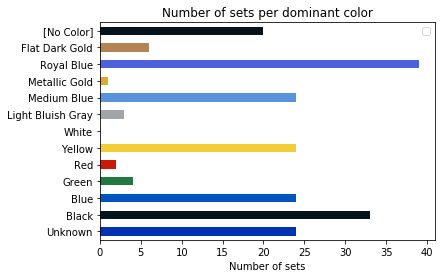

In [9]:
#TASK A3.3
# Merging sets, inventory_sets, inventory_parts, colors
sets_merged_inventory_sets = pd.merge(sets, inventory_sets, how = 'inner', left_on = 'id', right_on = 'set_id')
inventory_parts_merged_colors = pd.merge(inventory_parts, colors, how = 'inner', left_on = 'color_id', right_on = 'id')
merged = pd.merge(sets_merged_inventory_sets, inventory_parts_merged_colors, how = 'inner', left_on = 'inventory_id', right_on = 'inventory_id', suffixes = ('_invset', '_invpart'))

# Find dominant color of each set
merged['count_parts'] = 1
num_parts_per_color = merged.groupby(['set_id', 'color_id']).sum() # Sum to get the number of parts with the same color in each set
num_parts_per_color = num_parts_per_color.reset_index()
max_num_parts_per_color = num_parts_per_color.groupby('set_id').apply(lambda x: x.loc[x.count_parts == x.count_parts.max(),['count_parts','color_id']]) # Keep only the row where the number of parts per colors is maximum for each sets
max_num_parts_per_color['color_id'] = max_num_parts_per_color['color_id']/max_num_parts_per_color['count_parts'] # Compute the original color_id (which was multiplied by the number in "count_parts" during the addition)

# Add name and rgb from dataset colors
max_num_parts_per_color = max_num_parts_per_color.assign(name=max_num_parts_per_color['color_id'].map(colors.set_index('id')['name']))
max_num_parts_per_color = max_num_parts_per_color.assign(rgb=max_num_parts_per_color['color_id'].map(colors.set_index('id')['rgb']))

# Count number of sets per dominant color
max_num_parts_per_color = max_num_parts_per_color.reset_index()
max_num_parts_per_color['count_sets'] = 1
num_sets_per_dom_color = max_num_parts_per_color.groupby(['color_id','name','rgb']).sum() # Sum to get the number of sets for each dominant color
num_sets_per_dom_color = num_sets_per_dom_color.reset_index()
color_list = '#' + num_sets_per_dom_color['rgb'] # Add a hashtag at the beginning of each hexadecimal RGB codes

# Plot
ax3 = num_sets_per_dom_color.plot.barh(x='name', y='count_sets', color=color_list, title='Number of sets per dominant color')
ax3.set_xlabel('Number of sets'); ax3.set_ylabel(''); ax3.legend('');

#### Task A3.4
- Merge the two dataframes that contains resp. the publishing year and the color code
- Convert the color code from hex to RGB and compute the luminance for each set based on their dominant color
- Plot luminance vs publishing year

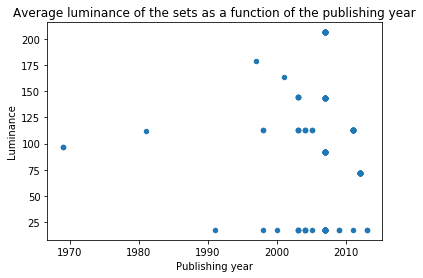

In [10]:
# TASK A3.4
temp4 = pd.merge(max_num_parts_per_color.dropna(), sets_clean, how='inner', left_on='set_id', right_on='id') # To have the pulishing year and the color code in a single dataframe

# Convert hex to RGB and compute the luminance
temp4['luminance'] = np.nan # Create a new column for the luminance
for i in range(0, temp4.index[-1]): # Loop to convert hex to RGB and compute the luminance
    rgbhexa = temp4.loc[i,'rgb']
    rgbdeci = tuple(int(rgbhexa[j:j+2], 16) for j in (0, 2 ,4))
    temp4.loc[i,'luminance'] = np.sqrt(0.299*rgbdeci[0]**2 + 0.587*rgbdeci[1]**2 + 0.114*rgbdeci[2]**2) # Compute the luminance
temp5 = temp4.reset_index()
temp5['year'] = temp5['year'].astype('float64') # Convert the year to a float

# Plot
ax4 = temp5.plot.scatter(x='year', y='luminance', title="Average luminance of the sets as a function of the publishing year")
ax4.set_xlabel('Publishing year'); ax4.set_ylabel('Luminance');

## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

### B1. Loading phase
Load the json file into a `DataFrame`.


In [12]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

Path to the datafolder '/bikes'

In [13]:
# Write your code here
file_path = BIKES_DATA_FOLDER + "/metro-bike-share-trip-data.json.zip"

data = pd.read_json(file_path)
data.columns = data.columns.str.lower().str.replace(' ', '_')
data['start_time'] = pd.to_datetime(data['start_time'], format='%Y-%m-%dT%H:%M:%S')
data['end_time'] = pd.to_datetime(data['end_time'], format='%Y-%m-%dT%H:%M:%S')
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132427 entries, 0 to 132426
Data columns (total 14 columns):
bike_id                       132417 non-null float64
duration                      132427 non-null int64
end_time                      132427 non-null datetime64[ns]
ending_station_id             132331 non-null float64
ending_station_latitude       131376 non-null float64
ending_station_longitude      131376 non-null float64
passholder_type               132427 non-null object
plan_duration                 131661 non-null float64
start_time                    132427 non-null datetime64[ns]
starting_station_id           132408 non-null float64
starting_station_latitude     132379 non-null float64
starting_station_longitude    132379 non-null float64
trip_id                       132427 non-null int64
trip_route_category           132427 non-null object
dtypes: datetime64[ns](2), float64(8), int64(2), object(2)
memory usage: 14.1+ MB


,bike_id,duration,end_time,ending_station_id,ending_station_latitude,ending_station_longitude,passholder_type,plan_duration,start_time,starting_station_id,starting_station_latitude,starting_station_longitude,trip_id,trip_route_category
0,6281.0,180,2016-07-07 04:20:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07 04:17:00,3014.0,34.056610,-118.23721,1912818,Round Trip
1,6281.0,1980,2016-07-07 06:33:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07 06:00:00,3014.0,34.056610,-118.23721,1919661,Round Trip
2,5861.0,300,2016-07-07 10:37:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07 10:32:00,3016.0,34.052898,-118.24156,1933383,Round Trip
3,5861.0,10860,2016-07-07 13:38:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07 10:37:00,3016.0,34.052898,-118.24156,1944197,Round Trip
4,6674.0,420,2016-07-07 12:58:00,3032.0,34.049889,-118.25588,Walk-up,0.0,2016-07-07 12:51:00,3032.0,34.049889,-118.25588,1940317,Round Trip


Read the wanted file with pandas.read_json(path_or_buf) function from the Pandas library.

### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [14]:
categorical = ["passholder_type", "trip_route_category"]

# print(len(data['Bike ID'].unique()))

for column in data.columns:
    if column in categorical:
        value_str = ""
        for value in data[column].unique():
            value_str += value + ", "
        print("The column: " + column + ", has the type: " + str(data[column].dtype) + ", and has values: " +
                value_str[:-2])
    else:
        print("The column: " + column + ", has the type: " + str(data[column].dtype) + ", and the value range: " +
                str(data[column].min()) + " - " + str(data[column].max()))
        
data_with_dummies = pd.get_dummies(data, columns=["passholder_type", "trip_route_category"])

redundantCols = ["end_time", "ending_station_latitude", "ending_station_longitude", "starting_station_latitude",
                 "starting_station_longitude", "plan_duration"]

redundantColumns = data_with_dummies[redundantCols]
dfWithoutRedundantCols = data_with_dummies.drop(columns=redundantCols)

data = data.drop(columns=redundantCols)
print()
print("dfWithoutRedundantCols shape and dtypes:")
display(dfWithoutRedundantCols.shape, dfWithoutRedundantCols.dtypes)
print("data_with_dummies shape and dtypes:")
display(data_with_dummies.shape, data_with_dummies.dtypes)
print("redundantColumns shape and dtypes:")
display(redundantColumns.shape, redundantColumns.dtypes)

The column: bike_id, has the type: float64, and the value range: 1349.0 - 6728.0
The column: duration, has the type: int64, and the value range: 60 - 86400
The column: end_time, has the type: datetime64[ns], and the value range: 2016-07-07 04:20:00 - 2017-04-02 10:32:00
The column: ending_station_id, has the type: float64, and the value range: 3000.0 - 4108.0
The column: ending_station_latitude, has the type: float64, and the value range: 0.0 - 34.0642815
The column: ending_station_longitude, has the type: float64, and the value range: -118.472832 - 0.0
The column: passholder_type, has the type: object, and has values: Monthly Pass, Flex Pass, Walk-up, Staff Annual
The column: plan_duration, has the type: float64, and the value range: 0.0 - 365.0
The column: start_time, has the type: datetime64[ns], and the value range: 2016-07-07 04:17:00 - 2017-03-31 23:45:00
The column: starting_station_id, has the type: float64, and the value range: 3000.0 - 4108.0
The column: starting_station_lati

(132427, 12)

bike_id                                  float64
duration                                   int64
ending_station_id                        float64
start_time                        datetime64[ns]
starting_station_id                      float64
trip_id                                    int64
passholder_type_Flex Pass                  uint8
passholder_type_Monthly Pass               uint8
passholder_type_Staff Annual               uint8
passholder_type_Walk-up                    uint8
trip_route_category_One Way                uint8
trip_route_category_Round Trip             uint8
dtype: object

data_with_dummies shape and dtypes:


(132427, 18)

bike_id                                  float64
duration                                   int64
end_time                          datetime64[ns]
ending_station_id                        float64
ending_station_latitude                  float64
ending_station_longitude                 float64
plan_duration                            float64
start_time                        datetime64[ns]
starting_station_id                      float64
starting_station_latitude                float64
starting_station_longitude               float64
trip_id                                    int64
passholder_type_Flex Pass                  uint8
passholder_type_Monthly Pass               uint8
passholder_type_Staff Annual               uint8
passholder_type_Walk-up                    uint8
trip_route_category_One Way                uint8
trip_route_category_Round Trip             uint8
dtype: object

redundantColumns shape and dtypes:


(132427, 6)

end_time                      datetime64[ns]
ending_station_latitude              float64
ending_station_longitude             float64
starting_station_latitude            float64
starting_station_longitude           float64
plan_duration                        float64
dtype: object

Describe the type and the value range of each attribute:
-  First we find the value range and dtype of each column in our DataFrame. Getting the dtype of each column could have been done by calling .info() on the DataFrame, but since we also need the range of the values we iterate over each column and printing the Series.dtype, Series.min() and Series.max(). We have some dtypes that are objects in the DataFrame. For the starting_time and ending_time we changed them to DateTime objects.

Indicate and transform the attributes that are Categorical:
-  Categorical attributes that can be transformed are: Passholder Type and Trip Route Category. The reason for this is that these are the only attributes that can be be splitt up into columns representing each value the attribute can have, also without creating an ridicolous amount of new columns. The data with the transformed categorical attributes is stored in the data_with_dummies DataFrame. Plan Duration could also be seen as Categorical data and be transformed, but since it is a redundant column we won't transform it.

Redundant columns in this dataset: 
1. End Time. This column could be calculated using the Start Time and Durations columns.
2. Ending and Stating Latitude and Longitude for starting and ending station. Theses four columns take up alot of space in the DataFrame, they could be stored in another DataFrame where the Station ID is the key/index. 
3. Plan Duration. This is basicly the same column as the Passholder Type. The only difference is that it is represented as a number and not a string. Passholder Type is also easier to one-hot encode using dummie variables.
4. Trip Route Category is also a redundant column because we can find out what type of trip it is by looking at the starting and ending station. We choose to not remove it here because we transformed the attribute.

What are the possible pitfalls of having such columns:
-  Having such columns will increas the amount of memory we have to use to store the DataFrame.
-  We also have to be carefull when we would like to update one or more of the columns that a redundant column is dependant on. We would have to check that the the value in the dependant column still is correct after the change, and if it's not we need to update it.
-  Also if we update one of the values in a column we need to update all the rows that contained the same value.

DataFrame with only redundant columns is called `redundantColumns`.

DataFrame with redundant columns is called `data_with_dummies`. 

DataFrame without redundant columns is called `dfWithoutRedundantCols`.

Both of the two last DataFrames have the categorical attributes one-hot encoded.

Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies:
-  The format that contains the redundand data columns is the one more susceptible to inconsistencies. This ie because of the reasons listed above (What are the possible pitfalls of having such columns).

At the end we displayed the requested inforamtion. This can be seen in the output space of the cell.

For task B3 we will use the data DataFrame with out the redundant columns, but not with the dummie columns.

### B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

In [15]:
data1, data2, data3, data4, data5 = data.copy(), data.copy(), data.copy(), data.copy(), data.copy()

#### Task B3.1

Min value is: 13, and max value is: 5138


Text(0.5,0,'Number of outgoing trips')

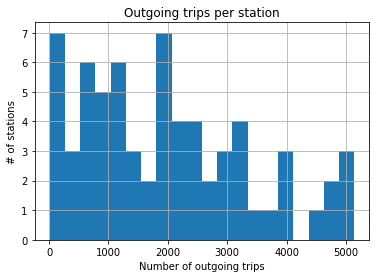

In [16]:
outgoing_values = data.groupby('starting_station_id').apply(lambda x : len(x))
print("Min value is: " + str(outgoing_values.min()) + ", " + "and max value is: " + str(outgoing_values.max()))
outgoing_values.hist(bins=20)
plt.title("Outgoing trips per station")
plt.ylabel("# of stations")
plt.xlabel("Number of outgoing trips")

1.  We want to count unique `Trip ID` values for the feature `Starting Station ID`. This will give us the amount of outgoing trips from each station. First we groupe by the DataFrame by `Starting Station ID` and get `Trip ID` Series from the resulting DataFrame. Then we call the Pandas.nunique() to get a Series with number of distinct observations for each `Starting Station ID`. The max value for the number of outgoing values is 5138 and the min value is 13 so the bins will have a range of 256,25.

#### Task B3.2


trip_stating_hour


Text(0.5,0,'Trip starting hour')

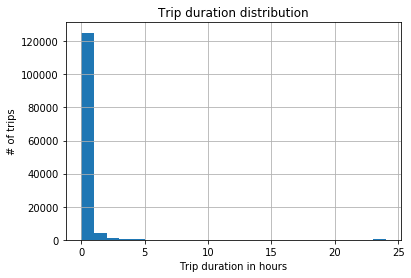

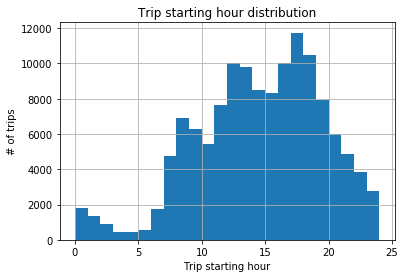

In [17]:
duration_values = data.copy()
duration_values['duration'] = duration_values['duration'].apply(lambda x : x / (60 * 60))
x, b = pd.cut(duration_values['duration'], [i for i in range(0,25)], right=False, retbins=True)[:20]
duration_values.hist(column=['duration'], bins=b)
plt.xlabel("Trip duration in hours")
plt.ylabel("# of trips")
plt.title("Trip duration distribution")
print()

print("trip_stating_hour")
start_time_hour = data.copy()
start_time_hour['start_time'] = start_time_hour['start_time'].apply(lambda x : x.hour)
x, b = pd.cut(start_time_hour['start_time'], [i for i in range(0,25)], right=False, retbins=True)[:20]
start_time_hour.hist(column=['start_time'], bins=b)
plt.title("Trip starting hour distribution")
plt.ylabel("# of trips")
plt.xlabel("Trip starting hour")

2.  To get the duration of a ride in hours we apply a lambda expresion on the column for `Duration`, as the duration of a ride is given i secounds we divide it by 60 * 60. This gives us a Series that we can use to plot the distribution of duration times in a histogram with 1-hour bins. We get the bins by using the `Pandas.cut()` function. To plot the second histogram we got the hours from the DateTimes object in the `starting_time` column and get the bins the same way as for the first histogram. As we can see on the histograms there a alot more ride lasting less than 1 hour. Around 7p.m. to 9p.m. we can see the highest increas in number of trips, indication that people ride the bikes to work. But at times when people are leaving work there are more bike rentals than when people are going to work, indicating that more people ride cars or buses to work and bikes from work.

#### Task B3.3

,Flex Pass,Monthly Pass,Staff Annual,Walk-up
One Way,0.075509,0.648033,0.002499,0.273959
Round Trip,0.037779,0.295033,0.006492,0.660696


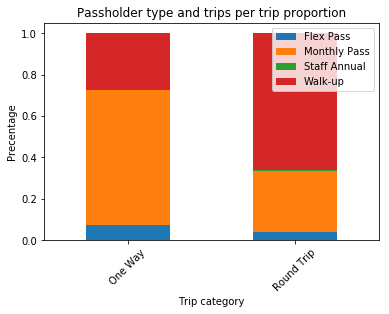

In [18]:
new_df = pd.DataFrame()
trips_by_passholder = data.groupby([data["trip_route_category"], data["passholder_type"]])
for category, d in trips_by_passholder:
    new_df.loc[category[0], category[1]] = len(d)
    
new_df = new_df.div(new_df.sum(axis=1), axis=0)
    
display(new_df)

fig = new_df.plot.bar(stacked=True)
plt.title("Passholder type and trips per trip proportion")
plt.xlabel("Trip category")
plt.xticks(rotation=45)
plt.ylabel("Precentage")
plt.legend()
plt.show()

3.  For this plot we created a new `DataFrame` and added the length of the data for each group after we had grouped the `DataFrame` on `trip_route_category` and `passholder_type`.

#### Task B3.4

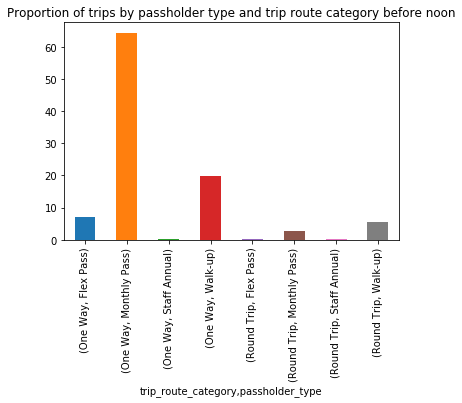

In [19]:
before_noon_df = data.copy()
before_noon_df = before_noon_df.query('start_time.dt.hour < 12', inplace=False)
before_noon_df = before_noon_df.groupby(['trip_route_category','passholder_type']).size()/len(before_noon_df)*100
ax = before_noon_df.plot(kind='bar', title='Proportion of trips by passholder type and trip route category before noon')

4. The goal for task B3.4 is to take only trips before noon. Then a bar plot is made with all different combination of trip_route_category and passholder_type to display the proportion of each. More people with Monthlt passes goes on one way trips than people with flex pass. Y-axis represent the precentage.

__Task B3.5__

First we want to separate the day into two intervals with approximately the same number of bikes leaving the station. In order to achieve this, we minimize the difference error between the number of trips in each of the two intervals.

In [20]:
error = []
for hour in range(24):
    err = (len(data.query('start_time.dt.hour < @hour')) - len(data.query('start_time.dt.hour >= @hour')))**2
    error.append(err)
separator = error.index(min(error))

print('Separation of the two intervals: ', separator, ' hours past midnight')
print('First interval: ', len(data.query('start_time.dt.hour < @separator')), ' bike trips')
print('Second interval: ', len(data.query('start_time.dt.hour >= @separator')), ' bike trips')

Separation of the two intervals:  15  hours past midnight
First interval:  66477  bike trips
Second interval:  65950  bike trips


After this, using the same strategy as above, we want to distribute the data into the right intervals. We calculate the proportion of trips by 'trip route category' and 'passholder type'.

In [21]:
distributions = pd.DataFrame()

for cat, d in data.query('start_time.dt.hour < @separator').groupby(['trip_route_category', 'passholder_type']):
    distributions.loc[cat[0] + ' ' + cat[1], 'Before 3 p.m.'] = len(d)
    
for cat, d in data.query('start_time.dt.hour >= @separator').groupby(['trip_route_category', 'passholder_type']):
    distributions.loc[cat[0] + ' ' + cat[1], 'After 3 p.m.'] = len(d)
    
distributions = distributions / (sum(distributions.values) * np.ones(len(distributions))[:, np.newaxis])

display(distributions)

,Before 3 p.m.,After 3 p.m.
One Way Flex Pass,0.069483,0.066945
One Way Monthly Pass,0.592115,0.578772
One Way Staff Annual,0.002753,0.001759
One Way Walk-up,0.236668,0.258438
Round Trip Flex Pass,0.004031,0.003260
Round Trip Monthly Pass,0.031093,0.025853
Round Trip Staff Annual,0.000888,0.000364
Round Trip Walk-up,0.062969,0.064610


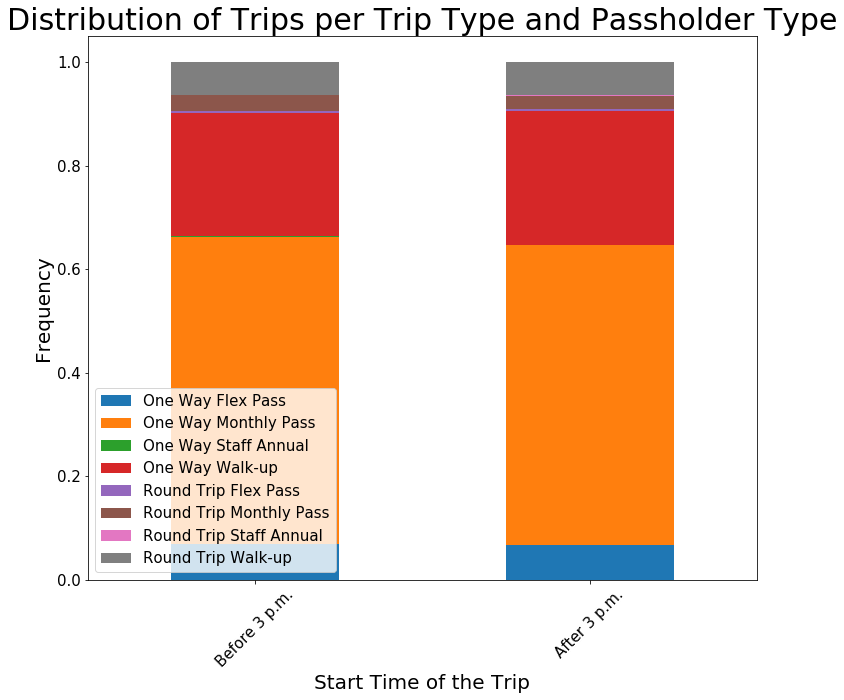

In [22]:
figure = distributions.T.plot(kind = 'bar', stacked = True, figsize = (12,10), fontsize = 15)
plt.xticks(rotation = 45)
plt.legend(prop = {'size': 15})
plt.title('Distribution of Trips per Trip Type and Passholder Type', size = 30)
plt.xlabel('Start Time of the Trip', size = 20)
plt.ylabel('Frequency', size = 20)
plt.show()

The differences between the two intervals are not very noticable, and this would suggest that the company would not have any significant benefit from creating a more complex paying scheme.